# Classification of subregion of tracks with kNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

We want to train a k-NN classifier that can learn some features that are characteristic for particular areas of the world. For this purpose, we use a dataset containing tracks that only charted in one of four selected subregions (Western Europe, Northern America, Eastern Asia, or Latin America and the Caribbean). 

In [2]:
from helpers.model import get_track_feature_subregion_dataset

data = get_track_feature_subregion_dataset()
data

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,single_release,region,subregion
id,,,,,,,,,,,,,,,,,
000RW47rhEkSqjgTrZx7YX,False,0.752,0.620,5.0,-5.536,1.0,0.0509,0.30900,0.000000,0.0750,0.962,117.399,164459.0,4.0,False,Americas,Latin America and the Caribbean
000xYdQfIZ4pDmBGzQalKU,False,0.509,0.803,0.0,-6.743,1.0,0.0400,0.68400,0.000539,0.4630,0.651,166.018,187119.0,4.0,False,Americas,Latin America and the Caribbean
001b8t3bYPfnabpjpfG1Y4,True,0.772,0.635,9.0,-4.846,1.0,0.3720,0.10500,0.000000,0.1170,0.541,95.951,167866.0,4.0,False,Europe,Western Europe
003VDDA7J3Xb2ZFlNx7nIZ,True,0.842,0.578,6.0,-6.050,0.0,0.1380,0.00419,0.000000,0.2280,0.190,74.496,236779.0,4.0,True,Americas,Northern America
006Q8ORZ9zPjf3IiO5evwX,True,0.820,0.518,9.0,-10.497,1.0,0.3380,0.32100,0.000000,0.0891,0.746,75.987,146842.0,4.0,False,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7ztdl6cnbJgHRdMkKldkts,False,0.641,0.618,0.0,-4.269,1.0,0.0259,0.09320,0.000000,0.1550,0.338,90.032,271160.0,4.0,False,Asia,Eastern Asia
7zvGNZu33bC4jZEkXHdDZ6,False,0.661,0.834,8.0,-4.426,1.0,0.0772,0.11800,0.000000,0.2730,0.652,169.952,153423.0,4.0,False,Americas,Latin America and the Caribbean
7zxRMhXxJMQCeDDg0rKAVo,True,0.744,0.715,0.0,-6.103,1.0,0.3510,0.10100,0.000000,0.0919,0.340,154.962,179773.0,4.0,False,Americas,Northern America


In [5]:
data[["region", "subregion"]].drop_duplicates()

,region,subregion
id,,
000RW47rhEkSqjgTrZx7YX,Americas,Latin America and the Caribbean
001b8t3bYPfnabpjpfG1Y4,Europe,Western Europe
003VDDA7J3Xb2ZFlNx7nIZ,Americas,Northern America
00FVmIy2twfxxY4wVLazft,Asia,Eastern Asia


The subregions are the target labels for our dataset. We can disregard the region column, all other columns are features that could be used by a classifier.

In [6]:
X = data.drop(columns=["region", "subregion"])
y = data.subregion

In [11]:
y.value_counts() / len(y)

Western Europe                     0.511673
Latin America and the Caribbean    0.246276
Eastern Asia                       0.149516
Northern America                   0.092536
Name: subregion, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022, test_size=0.25, stratify=y)

In [12]:
y_train.value_counts() / len(y_train)

Western Europe                     0.511673
Latin America and the Caribbean    0.246263
Eastern Asia                       0.149498
Northern America                   0.092566
Name: subregion, dtype: float64

## dummy classifier baseline

In [21]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.5116707616707616

In [22]:
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.25675675675675674

## Training basic KNN classifier and finding optimal parameters

For a k-NN classifier, data should always be on equal scale for all variables.

In [13]:
k_vals_to_try = np.arange(1, 21)
metrics_to_try = ['manhattan', 'euclidean', 'chebyshev']
weights_to_try = ['uniform', 'distance']

scaled_knn = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('knn', KNeighborsClassifier())
    ]
)

knn_params = {
    "knn__n_neighbors": k_vals_to_try,
    "knn__metric": metrics_to_try,
    "knn__weights": weights_to_try
}

scaled_knn_cv = GridSearchCV(
    scaled_knn,
    knn_params,
    verbose=10
)

In [14]:
scaled_knn_cv.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 1/5; 1/120] END knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform;, score=0.615 total time=   0.3s
[CV 2/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 2/5; 1/120] END knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform;, score=0.599 total time=   0.3s
[CV 3/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 3/5; 1/120] END knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform;, score=0.607 total time=   0.3s
[CV 4/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 4/5; 1/120] END knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform;, score=0.619 total time=   0.2s
[CV 5/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 5/5; 1/120] END knn__metric=manhatt

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'chebyshev'],
                         'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'knn__weights': ['uniform', 'distance']},
             verbose=10)

In [15]:
scaled_knn_cv.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 15,
 'knn__weights': 'distance'}

In [16]:
best_scaled_knn = scaled_knn_cv.best_estimator_
best_scaled_knn.score(X_test, y_test)

0.6765970515970516

## Trying standard scaling instead of min-max scaling

In [23]:
std_knn = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]
)

std_knn_cv = GridSearchCV(
    std_knn,
    {**knn_params},
    verbose=10,
    n_jobs=-1) # run jobs in parallel on all available processors

In [24]:
std_knn_cv.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 3/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 2/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 1/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 5/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 2/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 4/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 3/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 1/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 3/5; 1/120] END knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform;, score=0.650 total time=   1.9s
[CV 4/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 2/5; 2/120] END knn__metric=manhattan,

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'chebyshev'],
                         'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'knn__weights': ['uniform', 'distance']},
             verbose=10)

In [29]:
std_knn_cv.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 12,
 'knn__weights': 'distance'}

In [25]:
best_std_knn = std_knn_cv.best_estimator_
best_std_knn.score(X_test, y_test)

0.7051597051597052

Apparently standardization of features works even better!

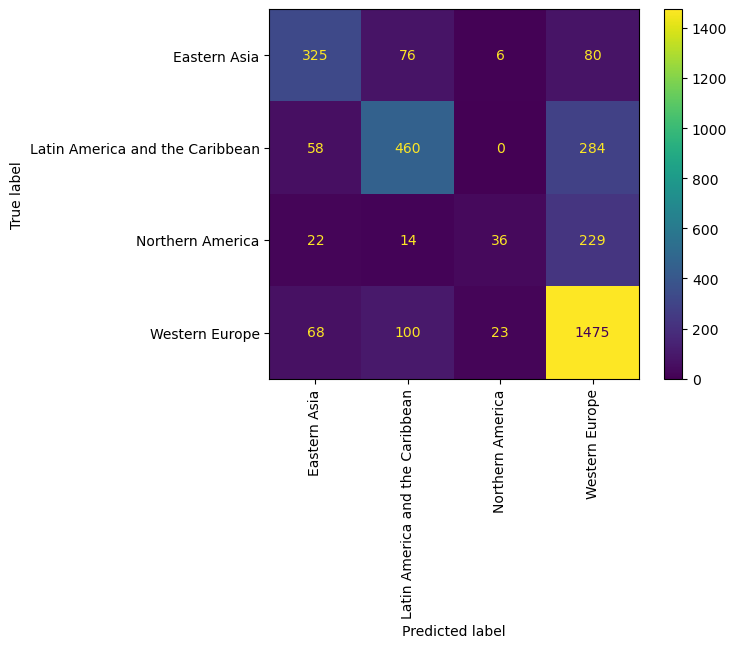

In [33]:
predictions = best_std_knn.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=best_std_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_std_knn.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

### Trying PCA

Text(0, 0.5, 'cumulative explained variance')

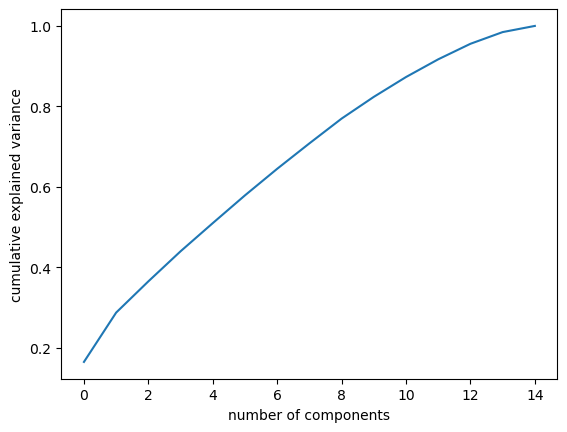

In [26]:
X_standardized = StandardScaler().fit_transform(X)
pca=PCA()
pca.fit(X_standardized)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [27]:
std_pca_knn = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('pca', PCA()),
        ('knn', KNeighborsClassifier())
    ]
)

pca_params = {
    "pca__n_components": np.arange(1,12)
}

pca_knn_cv = GridSearchCV(
    std_pca_knn,
    {**pca_params, **knn_params},
    verbose=10,
    n_jobs=-1) # run jobs in parallel on all available processors

In [28]:
pca_knn_cv.fit(X_train,y_train)

Fitting 5 folds for each of 1320 candidates, totalling 6600 fits
[CV 1/5; 1/1320] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform, pca__n_components=1
[CV 2/5; 1/1320] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform, pca__n_components=1
[CV 3/5; 1/1320] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform, pca__n_components=1
[CV 4/5; 1/1320] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform, pca__n_components=1
[CV 5/5; 1/1320] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform, pca__n_components=1
[CV 1/5; 2/1320] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform, pca__n_components=2
[CV 2/5; 2/1320] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform, pca__n_components=2
[CV 3/5; 2/1320] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform, pca__n_components=2
[CV 1/5; 1/1320] END knn__metric=manhattan, knn__n_neighbors=1, knn__we

KeyboardInterrupt: 

In [ ]:
pca_knn_cv.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 19,
 'knn__weights': 'distance',
 'pca__n_components': 11}

In [ ]:
best_pca_knn = pca_knn_cv.best_estimator_
best_pca_knn.score(X_test, y_test)

0.747906976744186

In [ ]:
import skops.io as sio
sio.dump(best_pca_knn, "best_pca_knn.joblib")

In [ ]:
sio.dump(best_scaled_knn, "best_scaled_knn.joblib")

In [ ]:
y_pred = best_pca_knn.predict(X_train)

In [ ]:

# ANOVA feature selection for numeric input and categorical output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=5)
X_selected = fs.fit_transform(X, y)

In [ ]:
X_selected

array([[0.00000e+00, 5.88000e-01, 1.73000e-01, 9.37000e-01, 1.95274e+05],
       [0.00000e+00, 7.80000e-01, 5.32000e-02, 8.37000e-01, 2.27693e+05],
       [0.00000e+00, 5.98000e-01, 1.59000e-01, 5.75000e-01, 2.54069e+05],
       ...,
       [0.00000e+00, 5.05000e-01, 2.70000e-02, 5.88000e-01, 3.52000e+05],
       [0.00000e+00, 5.22000e-01, 4.41000e-02, 7.78000e-01, 2.17687e+05],
       [1.00000e+00, 8.03000e-01, 7.25000e-02, 8.08000e-01, 1.41176e+05]])